# EDA and Mapping

### 1. Checking Image Sizes

In [1]:
import cv2
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
folder_path = Path("../Biomass_data/train")
images = []

for file_path in folder_path.glob('*'):
    img = cv2.imread(str(file_path)) 

    if img is not None:
        images.append(img)
    
print(f"Loaded {len(images)} images.")

Loaded 348 images.


In [3]:
directory = Path('../Biomass_data/train')
image_paths = list(directory.glob('*'))

In [4]:
images = np.array(images)
shape = images.shape
print(shape)

(348, 1000, 2000, 3)


Every image has the same size (1000 x 2000).

### 2. Checking lighting condition 

In [5]:
array_brightness = []

def check_brightness(images): 
    for i, img in enumerate(images):
        
        image_path = str(image_paths[i])
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        avg_brightness = np.mean(v)
        array_brightness.append([image_path ,avg_brightness])
    
check_brightness(images)


In [6]:
y = []
for i in array_brightness: 
    y.append(i[1])

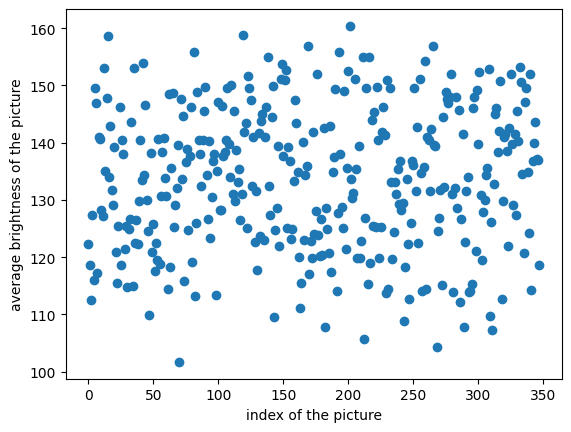

In [7]:
x = range(0,len(y))

plt.scatter(x , y)
plt.xlabel("index of the picture")
plt.ylabel("average brightness of the picture")
plt.show()

There are some pictures that are too dim and look like outliers, so I decided to remove those with an average brightness less than 100.

In [8]:
for path,brightness in array_brightness :
    if brightness < 95 :
        print( f"{path} : {brightness}" )
        #image = cv2.imread(path)
        # cv2.imshow(path ,image)
        Path(path).unlink(missing_ok=True)
        array_brightness.remove([path ,brightness])
# cv2.waitKey(0)
# cv2.desktroyAllWindows()

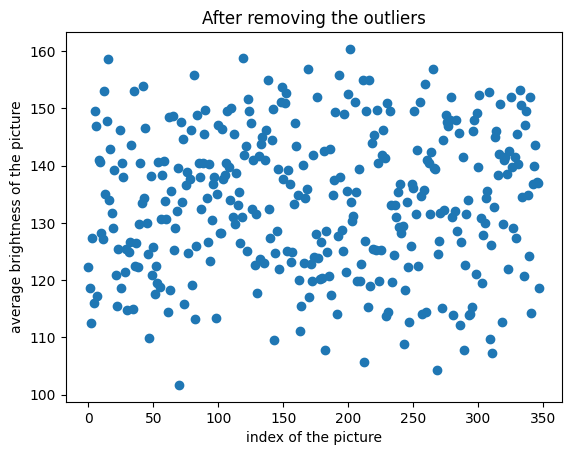

In [9]:
y = []
for i in array_brightness: 
    y.append(i[1])

x = range(0,len(array_brightness))

plt.scatter(x , y )
plt.title("After removing the outliers")
plt.xlabel("index of the picture")
plt.ylabel("average brightness of the picture")
plt.show()

## MAPPING


In [10]:
df = pd.read_csv("../Biomass_data/processed/after_eda.csv")

In [11]:
df.head()

,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750


First We are gonna check if the csv file has some paths that they are not inside the train directory.

In [12]:
def check_csv(image_paths, base_dir):
    missing_files = []
    for img_path in image_paths:
        full_path = base_dir / img_path 
        
        if not full_path.exists():
            missing_files.append(str(img_path))
    
    if len(missing_files) == 0:
        print("All images found")
    else:
        print(f"{len(missing_files)} images are missing.")
    return missing_files
missing = check_csv(df['image_path'], Path("../Biomass_data"))


45 images are missing.


45 images in the csv file is not found in the train folder which means we have to delete them. 

In [13]:
df = df[~df['image_path'].isin(missing)].reset_index(drop=True)
missing = check_csv(df['image_path'], Path("../Biomass_data"))

All images found


Let's delete the images that are inside the train folder but has no path in csv file. 

In [14]:
def check_images(csv_paths, base_dir):
    actual_files = {f.name for f in base_dir.glob('*') if f.is_file()}
    csv_filenames = {Path(p).name for p in csv_paths}
    
    extra_images = actual_files - csv_filenames
    
    if len(extra_images) == 0:
        print("No extra images found.")
    else:
        print(f"Found {len(extra_images)} extra images.")
        
    return extra_images

extra_files = check_images(df['image_path'], Path("../Biomass_data/train"))

No extra images found.


In [15]:
df.to_csv("../Biomass_data/processed/after_eda.csv" , index = False )